夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
import requests
import MeCab

res = requests.get('https://nlp100.github.io/data/neko.txt')
with open('neko.txt', 'w', encoding='utf-8') as f:
    f.write(res.text)
    
tagger = MeCab.Tagger('mecabrc')
with open('neko.txt', encoding='utf-8') as f:
    result = tagger.parse(f.read())
with open('neko.txt.mecab', 'w', encoding='utf-8') as f:
    f.write(result)

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
def load_mecab_gen(filename):
    with open(filename, encoding='utf-8') as f:
        sentence = []
        # 表層系\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音
        for line in iter(f.readline, ''):
            # 'EOS'のみtabで分割されていない
            surface, feature =  split if len((split := line.rstrip().split('\t'))) == 2 else (split[0], '')

            if surface in {'\u3000', '。', 'EOS'}:
                if sentence:
                    yield sentence
                    sentence = []
            else:
                # len(feature)==7のものも存在する模様
                pos, pos1, _, _, _, _, base, *_ = feature.split(',')
                sentence.append({'surface': surface, 'base': base, 'pos': pos, 'pos1': pos1})

In [3]:
for i, sentence in enumerate(load_mecab_gen('neko.txt.mecab')):
    print('-----------------')
    for item in sentence:
        print(item)
    if i > 3:
        break

-----------------
{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}
-----------------
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
-----------------
{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}
-----------------
{'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'か', 'base': 'か', 'pos': '助詞', 'pos1': '副助詞／並立助詞／終助詞'}
{'surface': 'とんと', 'base': 'とんと', 'pos':

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
surfaces = set()
for sentence in load_mecab_gen('neko.txt.mecab'):
    for item in sentence:
        if item['pos'] == '動詞':
            surfaces.add(item['surface'])
            
print(f'動詞の表層形の数: {len(surfaces)}')
list(surfaces)[:13]

動詞の表層形の数: 3892


['与',
 '帰る',
 '向き直る',
 'ねじる',
 'ちゃい',
 '卸せ',
 '叱',
 '頂い',
 'はなち',
 'よみ',
 'まえ',
 'おっしゃい',
 '分捕っ']

## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [5]:
bases = set()
for sentence in load_mecab_gen('neko.txt.mecab'):
    for item in sentence:
        if item['pos'] == '動詞':
            bases.add(item['base'])
            
print(f'動詞の基本形の数: {len(bases)}')
list(bases)[:13]

動詞の基本形の数: 2298


['拡げる',
 '帰る',
 '向き直る',
 'ねじる',
 '倒れる',
 '手こずる',
 '忍ぶ',
 '極め付ける',
 '押す',
 'のめる',
 '論じる',
 '出合う',
 '埋める']

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
noun_phrases = set()
for sentence in load_mecab_gen('neko.txt.mecab'):
    if len(sentence) >= 3:
        for i in range(len(sentence) - 2):
            prev, curr, next_ = sentence[i:i+3]
            if prev['pos'] == '名詞' and curr['surface'] == 'の' and next_['pos'] == '名詞':
                noun_phrases.add(f"{prev['surface']}{curr['surface']}{next_['surface']}")
                
print(f'名詞句の数: {len(noun_phrases)}')
list(noun_phrases)[:13]

名詞句の数: 4927


['目の間',
 '中の人間',
 '顔の掃除',
 '自分の代理',
 '淑女の品性',
 '自然の傾向',
 '櫓の上',
 '君のため',
 '金田のじいさん',
 '新道の二絃琴',
 '新聞の上',
 '男爵のよう',
 '自分のもの']

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
nouns = set()
for sentence in load_mecab_gen('neko.txt.mecab'):
    items_list = [[]]
    for item in sentence:
        if item['pos'] == '名詞':
            items_list[-1].append(item)
        else:
            if items_list[-1]:
                items_list.append([])
    
    for items in items_list:
        if len(items) > 1:
            nouns.add(''.join([item['surface'] for item in items]))

print(f'名詞の連結の数: {len(nouns)}')
list(nouns)[:13]

名詞の連結の数: 4493


['自殺クラブ',
 '双方共挨拶',
 '肉食論者',
 'なに芸術',
 '一体君',
 '金田流',
 '八百八十八株半',
 '二叉',
 'その後書斎',
 '本当ら',
 '二十年来着',
 '三箇月前',
 '柔術使']

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
import re
from collections import defaultdict

word2freq = defaultdict(int)
for sentence in load_mecab_gen('neko.txt.mecab'):
    for item in sentence:
        if re.search('\w+', (word := item['base'])):
            word2freq[word] += 1
        
word2freq = dict(sorted(word2freq.items(), key=lambda x: x[1], reverse=True))

for i, (word, freq) in enumerate(word2freq.items()):
    print(f'word: {word} - freq: {freq}')
    if i == 13:
        break

word: の - freq: 9194
word: て - freq: 6853
word: は - freq: 6422
word: に - freq: 6268
word: を - freq: 6071
word: だ - freq: 5978
word: と - freq: 5515
word: が - freq: 5339
word: た - freq: 4270
word: する - freq: 3669
word: ない - freq: 3054
word: も - freq: 2479
word: ある - freq: 2322
word: で - freq: 2090


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

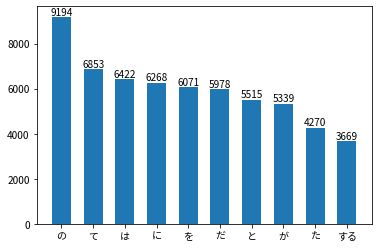

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rc('font', family='Noto Sans CJK JP')

words, freqs = zip(*list(word2freq.items())[:10])

plt.bar(np.array(words), np.array(freqs), width=0.6)
for x, y in zip(words, freqs):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

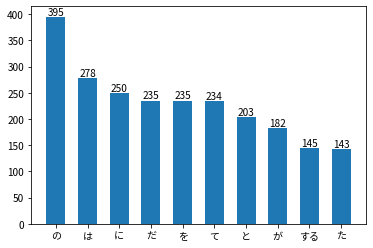

In [10]:
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rc('font', family='Noto Sans CJK JP')

with_cat = defaultdict(int)
for sentence in load_mecab_gen('neko.txt.mecab'):
    if any(item['base'] == '猫' for item in sentence):
        for item in sentence:
            if (word := item['base']) != '猫' and re.search('\w+', word):
                with_cat[item['base']] += 1

with_cat = dict(sorted(with_cat.items(), key=lambda x: x[1], reverse=True))

words, freqs = zip(*list(with_cat.items())[:10])

plt.bar(np.array(words), np.array(freqs), width=0.6)
for x, y in zip(words, freqs):
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

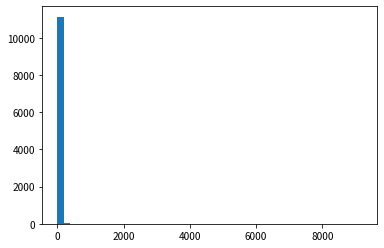

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(np.array(list(word2freq.values())), bins=50)
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

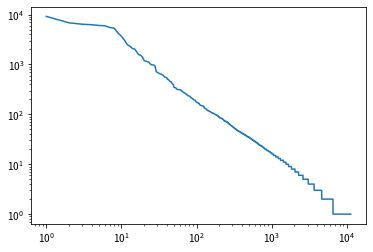

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([i for i, _ in enumerate(word2freq, 1)])
y = np.array(list(word2freq.values()))

plt.plot(x, y)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()